In [1]:
import numpy as np
import pandas as pd
import matplotlib

### Simulating Binomial Distribution probability

In [19]:
def head_tail_simulation():
    if np.random.random(1) > 0.5:
        return "head"
    else:
        return "tail"


In [20]:
def count_tails():
    coin_tosses = [head_tail_simulation() for i in range(0,3)]
    num_tails = len([x for x in coin_tosses if x == "tail"])
    #print(coin_tosses)
    #print(num_tails)
    return num_tails

In [55]:
# Repeat experiment multiple values
num_experiments = 10000
exp_results = [count_tails() for i in range(0,num_experiments)]
num_times_3_tails = len([x for x in exp_results if x == 3])

proportion = np.round(num_times_3_tails/num_experiments,4)

In [56]:
proportion

0.1247

### Simulating Expected value

In [1200]:
def play_tail_count_game():
    res = []
    for i in range(0,3):
        res.append(head_tail_simulation())
    tail_count = len([x for x in res if x == "tail"])
    if tail_count == 3:
        return 1000
    else:
        return -200


In [1201]:
play_tail_count_game()

1000

In [1202]:
0.125*1000 - (1-0.125)*200

-50.0

In [1210]:
num_games_play = 10000
total_win_or_loss = np.sum([play_tail_count_game() for i in range(0,num_games_play)])
avg_win_loss = total_win_or_loss/num_games_play

if total_win_or_loss < 0:
    print("You lost total, ", total_win_or_loss, "with an average loss per game of ", avg_win_loss)
else:
    print("You gained total, ", total_win_or_loss, "with an average gained per game of ", avg_win_loss)

You lost total,  -489200 with an average loss per game of  -48.92


### Simulation game 2

In [1211]:
def simulate_dice_throw():
    dice_throw = [np.random.randint(low=1,high=7) for i in range(0,10)]
    num_6 = len([x for x in dice_throw if x == 6])

    if num_6 >= 3:
        return 1000
    else:
        return -200


In [1220]:
total_games_played = 100000
total_gain_loss = sum([simulate_dice_throw() for i in range(0,total_games_played)])
avg_gain_loss = total_gain_loss/total_games_played
avg_gain_loss

67.624

In [1213]:
### Confirm number using binomial theorem
winning_prob = 1 - np.sum(stats.binom.pmf(k=np.arange(0,3),n=10,p=1/6))

In [1214]:
expected_gain_loss = 1000*winning_prob - 200*(1-winning_prob)

In [1215]:
expected_gain_loss

69.72784255448823

In [751]:
### what is the variation from expected values

In [753]:
def play_games_n_times(n,total_games_played):
    avg_gain_loss = []
    for i in range(0,n):
        total_gain_loss = sum([simulate_dice_throw() for i in range(0,total_games_played)])
        avg_gain_loss.append(total_gain_loss/total_games_played)
    return avg_gain_loss
    

In [758]:
play_games_n_times(10,1000)

[64.0, 58.0, 82.0, 52.0, 48.4, 70.0, 67.6, 76.0, 64.0, 64.0]

## Normal distribution

In [1221]:
salary_data = pd.read_csv("baltimore-city-employee-salaries-fy2019-1.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe208972d30>]],
      dtype=object)

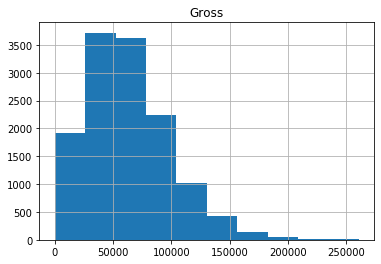

In [1222]:
salary_data.hist(column="Gross")

In [1223]:
salary_data["Gross"].mean()

62300.9465754674

In [1224]:
# take a sample
sample_pop = salary_data.sample(n = 1000)

In [1225]:
sample_mean = sample_pop["Gross"].mean()
print(sample_mean)

62092.07195789474


In [1226]:
salary_data["Gross"].std()

36808.87575008904

In [1227]:
sample_pop["Gross"].std()

36000.745941070396

In [1231]:
# Q: How many people have salary less than 60k


In [1321]:
sample_pop = salary_data.sample(n = 1000)
sample_mean = sample_pop["Gross"].mean()
sample_sd = sample_pop["Gross"].std()
z_value = (60000 - sample_mean)/sample_sd

In [1322]:
stats.norm.cdf(z_value)

0.4600583740035389

In [1327]:
1 - (0.0013*2)

0.9974

In [1310]:
actual_prop = salary_data[salary_data["Gross"] < 60000].shape[0]/salary_data.shape[0]
actual_prop

0.494895373253204

### Central limit theorem

In [1328]:
pop = np.random.randint(low=200000,high=1000000,size=100000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe208cdb438>]],
      dtype=object)

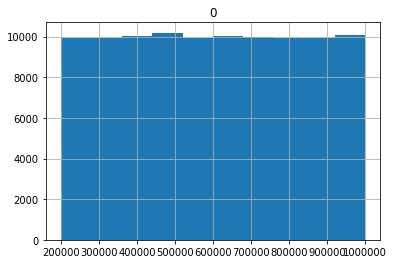

In [1330]:
pd.DataFrame(pop).hist()

In [1331]:
np.mean(pop)

600139.75507

In [1339]:
# can we use normal distribution curve to answer questions like - 
#..."what % of people have salary greater than 8 lacs"

In [1349]:
# draw repeated sample from this population
sample_size = 1000
sample_mean = np.mean(np.random.choice(pop,size=sample_size))
np.mean(sample_mean)
sample_sd = np.std(np.random.choice(pop,size=sample_size))

In [1353]:
# using normal distribution curve
z_value = (800000 - sample_mean)/sample_sd
1 - stats.norm.cdf(z_value)

0.19102745197395854

In [1354]:
# actual proportion
len([x for x in pop if x > 800000])/len(pop)

0.24988

In [1355]:
num_samples = 500
multiple_sample_means = [np.mean(np.random.choice(pop,size=sample_size)) for i in range(0,num_samples)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe208e49828>]],
      dtype=object)

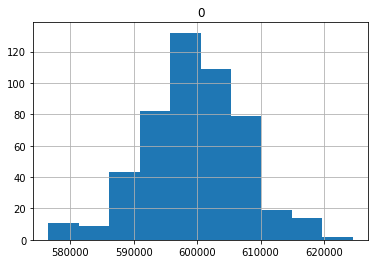

In [1356]:
pd.DataFrame(multiple_sample_means).hist()

In [1357]:
np.mean(multiple_sample_means)

599591.9006180001

In [1358]:
np.std(multiple_sample_means)

7698.791957518491

In [1359]:
np.std(pop)/np.sqrt(sample_size)

7298.058533997512

In [829]:
### computing confidence interval

In [830]:
## We take a single sample (sample size = 1000) from the above population. 

In [930]:
sample_size=1000
sample_drawn = np.random.choice(pop,size=sample_size)

In [931]:
mu = np.mean(sample_drawn)

In [936]:
mu_plus_se = mu + 2*(np.std(sample_drawn)/np.sqrt(sample_size))
mu_minus_se = mu - 2*(np.std(sample_drawn)/np.sqrt(sample_size))

In [937]:
mu_plus_se

610610.5486538564

In [938]:
mu_minus_se

581441.5453461437

In [ ]:
# confirm the confience interval using simulation

In [954]:
num_samples = 50000
multiple_sample_means = [np.mean(np.random.choice(pop,size=sample_size)) for i in range(0,num_samples)]

In [955]:
len([x for x in multiple_sample_means if (x > mu_minus_se) & (x < mu_plus_se)])/len(multiple_sample_means)

0.92622